In [1]:
#RUN
import numpy as np
import pandas as pd

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

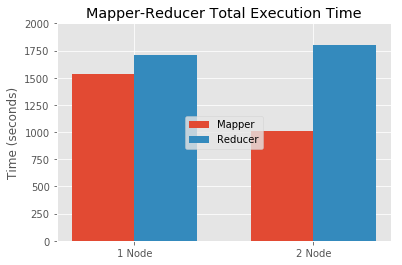

In [18]:
import numpy as np

N = 2
men_means = (1532, 1008)
women_means = (1708, 1805)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Mapper')
plt.bar(ind + width, women_means, width,
    label='Reducer')

plt.ylabel('Time (seconds)')
plt.title('Mapper-Reducer Total Execution Time')
# plt.set_xlim([xmin,xmax])
plt.ylim([0,2000])

plt.xticks(ind + width / 2, ('1 Node', '2 Node'))
plt.legend(loc='center')
plt.show()

Read the CSV file and remove the last row from dataframe because the last row is the captured ACUBA scores for this dataset.

In [2]:
#RUN
df=pd.read_csv("RESULTS_EUROVIS2015.csv");

AUC_scores=df.tail(1);
main_df=df[:-1];

print("Total number of rows in original dataframe:"+str(len(df.index)));
print("Total number of rows in modified dataframe:"+str(len(main_df.index)));


Total number of rows in original dataframe:829
Total number of rows in modified dataframe:828


In [3]:
# Optional
main_df.describe()

,indexFile,indexDR,classNum,scoreA,scoreM,scoreDes,DSC,CAL,HM,LDA,...,DC 20%,HDM 80,DC 2%,DUNN,DC 1%,DC 0.5%,CDM 1,DC 0.2%,DC 0.1%,AWTN
count,828.000000,828.000000,828.00000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,...,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,37.751208,2.450483,3.52657,2.979469,2.949275,0.507246,77.429402,80.298799,82.342098,0.594322,...,63.634851,98.403195,96.553164,0.027152,99.459394,99.935704,87.927730,99.996095,99.999158,270.766188
std,20.766822,1.115446,2.54403,1.631259,1.749717,0.500250,14.363301,118.300177,10.342507,1.481028,...,19.729777,3.748677,4.953790,0.059874,1.121827,0.185837,7.215781,0.019771,0.005084,78.268813
min,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,29.010239,0.007398,47.360794,0.000002,...,5.374185,53.901868,57.287289,0.000891,87.332331,97.799476,39.832298,99.711761,99.925354,38.993885
25%,16.000000,1.000000,2.00000,1.000000,1.000000,0.000000,66.650000,3.798646,75.515331,0.012565,...,52.270991,98.247322,95.165531,0.003489,99.374314,99.944297,84.619306,99.999112,100.000000,235.497898
50%,40.000000,3.000000,3.00000,3.000000,3.000000,1.000000,79.335260,24.730365,83.765962,0.091180,...,64.001399,100.000000,98.675758,0.007414,99.875350,99.992992,89.100684,100.000000,100.000000,286.045767
75%,55.000000,3.000000,5.00000,5.000000,5.000000,1.000000,89.450000,113.261177,90.789427,0.533361,...,76.557142,100.000000,99.852436,0.026669,100.000000,100.000000,92.874167,100.000000,100.000000,324.972774
max,70.000000,4.000000,13.00000,5.000000,5.000000,1.000000,100.000000,1038.602336,99.005716,25.837629,...,100.000000,100.000000,100.000000,0.707247,100.000000,100.000000,99.310559,100.000000,100.000000,457.396744


In [4]:
# Optional
main_df.columns

Index(['fileName', 'indexFile', 'indexDR', 'classNum', 'scoreA', 'scoreM',
       'scoreDes', 'DSC', 'CAL', 'HM', 'LDA', 'WII', 'SIL', 'GAM', 'ABW', 'CS',
       'HDM 10', 'ABTN', 'HDM 5', 'CDM 4', 'CDM 3', 'DC 10%', 'CDM 5', 'CDM 2',
       'CDM 6', 'CDM 7', 'DC 5%', 'CDM 8', 'CDM 10', 'CDM 9', 'HDM 20',
       'HDM 40', 'DC 20%', 'HDM 80', 'DC 2%', 'DUNN', 'DC 1%', 'DC 0.5%',
       'CDM 1', 'DC 0.2%', 'DC 0.1%', 'AWTN'],
      dtype='object')

In [5]:
# RUN
#rerranging the columms in the order given in the paper.
target_var='scoreDes'
file_descriptors=['fileName', 'indexFile', 'indexDR', 'classNum', 'scoreA', 'scoreM']+[target_var]


measure_cols=['ABTN','AWTN','ABW','WII','CAL','LDA','DUNN','GAM','SIL','HM','CS','DSC',
            'CDM 1','CDM 2','CDM 3','CDM 4','CDM 5', 'CDM 6', 'CDM 7', 'CDM 8', 'CDM 9', 'CDM 10',
           'DC 0.1%','DC 0.2%','DC 0.5%','DC 1%','DC 2%','DC 5%','DC 10%','DC 20%',
           'HDM 5','HDM 10','HDM 20','HDM 40','HDM 80']

new_cols=file_descriptors+measure_cols;

In [6]:
# RUN
main_df=main_df[new_cols]
main_df.columns

Index(['fileName', 'indexFile', 'indexDR', 'classNum', 'scoreA', 'scoreM',
       'scoreDes', 'ABTN', 'AWTN', 'ABW', 'WII', 'CAL', 'LDA', 'DUNN', 'GAM',
       'SIL', 'HM', 'CS', 'DSC', 'CDM 1', 'CDM 2', 'CDM 3', 'CDM 4', 'CDM 5',
       'CDM 6', 'CDM 7', 'CDM 8', 'CDM 9', 'CDM 10', 'DC 0.1%', 'DC 0.2%',
       'DC 0.5%', 'DC 1%', 'DC 2%', 'DC 5%', 'DC 10%', 'DC 20%', 'HDM 5',
       'HDM 10', 'HDM 20', 'HDM 40', 'HDM 80'],
      dtype='object')

In [7]:
main_df.describe()

,indexFile,indexDR,classNum,scoreA,scoreM,scoreDes,ABTN,AWTN,ABW,WII,...,DC 1%,DC 2%,DC 5%,DC 10%,DC 20%,HDM 5,HDM 10,HDM 20,HDM 40,HDM 80
count,828.000000,828.000000,828.00000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,...,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,37.751208,2.450483,3.52657,2.979469,2.949275,0.507246,338.962642,270.766188,1.319842,0.319472,...,99.459394,96.553164,85.741579,74.872428,63.634851,71.313912,80.529741,89.152458,95.264410,98.403195
std,20.766822,1.115446,2.54403,1.631259,1.749717,0.500250,111.231871,78.268813,0.629271,0.289950,...,1.121827,4.953790,13.214279,17.521521,19.729777,19.202670,16.130626,12.025008,6.933171,3.748677
min,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,49.310536,38.993885,0.600845,-3.527704,...,87.332331,57.287289,21.619166,10.517643,5.374185,3.658876,12.357476,31.797620,51.107174,53.901868
25%,16.000000,1.000000,2.00000,1.000000,1.000000,0.000000,275.088871,235.497898,1.015355,0.253168,...,99.374314,95.165531,79.880495,66.123959,52.270991,60.522081,72.438332,84.133503,93.066142,98.247322
50%,40.000000,3.000000,3.00000,3.000000,3.000000,1.000000,350.604171,286.045767,1.209355,0.372944,...,99.875350,98.675758,88.616953,76.929400,64.001399,72.610273,83.561170,92.835117,97.952218,100.000000
75%,55.000000,3.000000,5.00000,5.000000,5.000000,1.000000,401.936194,324.972774,1.431921,0.474543,...,100.000000,99.852436,95.800770,87.248803,76.557142,85.641875,93.738713,98.802395,100.000000,100.000000
max,70.000000,4.000000,13.00000,5.000000,5.000000,1.000000,939.229710,457.396744,9.333784,0.645071,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# Initial work

Used the data and tried few binary classifier on the data to find auc for the curves

In [121]:
# INITIAL WORK IS OPTIONAL

In [8]:
main_df[target_var].value_counts()

1    420
0    408
Name: scoreDes, dtype: int64

In [9]:
# Select first five attributes
measure_cols_5=['ABTN','AWTN','ABW','WII','CAL']
# df_col_5 holds the first five as a dataframe
df_col_5 = main_df[measure_cols_5]
# y = target value 'scoreDes'
y = main_df[target_var]
df_col_5.describe()

,ABTN,AWTN,ABW,WII,CAL
count,828.000000,828.000000,828.000000,828.000000,828.000000
mean,338.962642,270.766188,1.319842,0.319472,80.298799
std,111.231871,78.268813,0.629271,0.289950,118.300177
min,49.310536,38.993885,0.600845,-3.527704,0.007398
25%,275.088871,235.497898,1.015355,0.253168,3.798646
50%,350.604171,286.045767,1.209355,0.372944,24.730365
75%,401.936194,324.972774,1.431921,0.474543,113.261177
max,939.229710,457.396744,9.333784,0.645071,1038.602336


In [10]:
df_col_5.head()

,ABTN,AWTN,ABW,WII,CAL
0,432.673057,330.792098,1.307991,0.320842,168.392790
1,436.826178,327.474607,1.333924,0.305026,202.032855
2,436.369860,327.621398,1.331933,0.313059,179.412919
3,430.096586,324.705526,1.324574,0.312085,181.354553
4,429.725772,324.363518,1.324828,0.309980,192.947084


In [28]:
# Logistic regression Initialization
from sklearn.linear_model import LogisticRegression
LogReg_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [12]:
# Random Forest Initialization
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [13]:
# Storing all the attribute columns in different variables for easy computation
X1 = df_col_5['ABTN'].values.reshape(-1,1)
X2 = df_col_5['AWTN'].values.reshape(-1,1)
X3 = df_col_5['ABW'].values.reshape(-1,1)
X4 = df_col_5['WII'].values.reshape(-1,1)
X5 = df_col_5['CAL'].values.reshape(-1,1)

In [14]:
# yClass for LogisticRegression(LogReg) and RandomForest(RF)
yClass = main_df[target_var]
LogReg_clf.fit(X1, yClass)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
RF_clf.fit(X1, yClass)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
LogReg_res = LogReg_clf.predict(X1)
LogReg_res.shape

(828,)

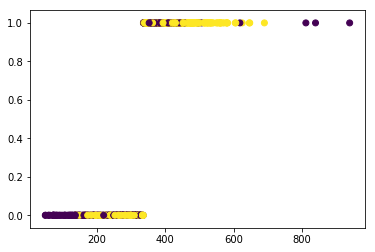

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X1[:,0], LogReg_res, marker='o', c=yClass)
plt.show()

In [20]:
RF_res = RF_clf.apply(X1)
RF_res.shape

(828, 100)

In [21]:
RF_res[0]

array([5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5,
       6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5])

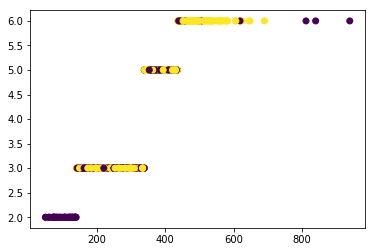

In [22]:
plt.scatter(X1[:,0], RF_res[:,45], marker='o', c=yClass)
plt.show()

In [124]:
#Using OneVsRestClassifier as the binary Classifer

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# data -> df_col_5
# y = targetVar
# X = df_col_5.copy(deep=True)
y = main_df[target_var]

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [30]:
main_df.columns

Index(['fileName', 'indexFile', 'indexDR', 'classNum', 'scoreA', 'scoreM',
       'scoreDes', 'ABTN', 'AWTN', 'ABW', 'WII', 'CAL', 'LDA', 'DUNN', 'GAM',
       'SIL', 'HM', 'CS', 'DSC', 'CDM 1', 'CDM 2', 'CDM 3', 'CDM 4', 'CDM 5',
       'CDM 6', 'CDM 7', 'CDM 8', 'CDM 9', 'CDM 10', 'DC 0.1%', 'DC 0.2%',
       'DC 0.5%', 'DC 1%', 'DC 2%', 'DC 5%', 'DC 10%', 'DC 20%', 'HDM 5',
       'HDM 10', 'HDM 20', 'HDM 40', 'HDM 80'],
      dtype='object')

In [107]:
# X1 = df_col_5['ABTN'].values.reshape(-1,1)
# X2 = df_col_5['AWTN'].values.reshape(-1,1)
# X3 = df_col_5['ABW'].values.reshape(-1,1)
# X4 = df_col_5['WII'].values.reshape(-1,1)
# X5 = df_col_5['CAL'].values.reshape(-1,1)
# y = main_df[target_var]
# # Binarize the output
# y = label_binarize(y, classes=[0, 1, 2])
# n_classes = y.shape[1]

auc_dict = []

In [78]:
main_df.describe()

,indexFile,indexDR,classNum,scoreA,scoreM,scoreDes,ABTN,AWTN,ABW,WII,...,DC 1%,DC 2%,DC 5%,DC 10%,DC 20%,HDM 5,HDM 10,HDM 20,HDM 40,HDM 80
count,828.000000,828.000000,828.00000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,...,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,37.751208,2.450483,3.52657,2.979469,2.949275,0.507246,338.962642,270.766188,1.319842,0.319472,...,99.459394,96.553164,85.741579,74.872428,63.634851,71.313912,80.529741,89.152458,95.264410,98.403195
std,20.766822,1.115446,2.54403,1.631259,1.749717,0.500250,111.231871,78.268813,0.629271,0.289950,...,1.121827,4.953790,13.214279,17.521521,19.729777,19.202670,16.130626,12.025008,6.933171,3.748677
min,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,49.310536,38.993885,0.600845,-3.527704,...,87.332331,57.287289,21.619166,10.517643,5.374185,3.658876,12.357476,31.797620,51.107174,53.901868
25%,16.000000,1.000000,2.00000,1.000000,1.000000,0.000000,275.088871,235.497898,1.015355,0.253168,...,99.374314,95.165531,79.880495,66.123959,52.270991,60.522081,72.438332,84.133503,93.066142,98.247322
50%,40.000000,3.000000,3.00000,3.000000,3.000000,1.000000,350.604171,286.045767,1.209355,0.372944,...,99.875350,98.675758,88.616953,76.929400,64.001399,72.610273,83.561170,92.835117,97.952218,100.000000
75%,55.000000,3.000000,5.00000,5.000000,5.000000,1.000000,401.936194,324.972774,1.431921,0.474543,...,100.000000,99.852436,95.800770,87.248803,76.557142,85.641875,93.738713,98.802395,100.000000,100.000000
max,70.000000,4.000000,13.00000,5.000000,5.000000,1.000000,939.229710,457.396744,9.333784,0.645071,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# LogisticRegression

In [119]:
# Logistic regression Initialization
from sklearn.linear_model import LogisticRegression
LogReg_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

def logreg_auc(columns):
    auc_dict = []
    for col in columns:
        print(col)
        X = main_df[col].values.reshape(-1,1)
        X_train, X_test, y_train, y_test = train_test_split(X, yClass, test_size=.5, random_state=0)

        LogReg_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
        LogReg_clf.fit(X_train, y_train)
        y_score = LogReg_clf.predict(X_test)

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        auc_dict.append([col, roc_auc])
    auc_dict.sort(key=lambda x:x[1], reverse=True)

ABTN
AWTN
ABW
WII
CAL
LDA
DUNN
GAM
SIL
HM
CS
DSC
CDM 1
CDM 2
CDM 3
CDM 4
CDM 5
CDM 6
CDM 7
CDM 8
CDM 9
CDM 10
DC 0.1%
DC 0.2%
DC 0.5%
DC 1%
DC 2%
DC 5%
DC 10%
DC 20%
HDM 5
HDM 10
HDM 20
HDM 40
HDM 80


In [125]:
roc_auc_score(y_test, y_score)

0.6528611117596246

In [120]:
auc_dict

[['HM', 0.8154226881143044],
 ['DSC', 0.8139635327901384],
 ['CAL', 0.7977727453131931],
 ['WII', 0.7963252632316205],
 ['SIL', 0.7912824224313031],
 ['HM', 0.7893563374034039],
 ['LDA', 0.7893446641608106],
 ['GAM', 0.7856092265309458],
 ['ABTN', 0.7711344057152196],
 ['CS', 0.77057409007074],
 ['WII', 0.769336726355847],
 ['ABW', 0.7681460556113278],
 ['SIL', 0.7681227091261411],
 ['DSC', 0.7626362851072771],
 ['HDM 10', 0.7624728597109706],
 ['HDM 5', 0.7622160483739173],
 ['GAM', 0.7611070903275512],
 ['CDM 4', 0.7597646674293186],
 ['CDM 3', 0.7595778955478254],
 ['DC 10%', 0.757570097821773],
 ['ABW', 0.7574883851236196],
 ['CDM 5', 0.7454299255247122],
 ['CDM 6', 0.7379123572946094],
 ['LDA', 0.7365349146685967],
 ['CAL', 0.7316088062942124],
 ['CDM 7', 0.7311885695608527],
 ['CDM 10', 0.7287838815866271],
 ['CDM 8', 0.727639903812481],
 ['CDM 4', 0.7263441738846217],
 ['CDM 9', 0.7256787990568021],
 ['CDM 3', 0.719048397263792],
 ['CDM 2', 0.7177643405785259],
 ['CS', 0.7172390

In [108]:
# for col in main_df.columns:
# shuffle and split training and test sets
for col in measure_cols:
    print(col)
    X = main_df[col].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)


    random_state = np.random.RandomState(0)
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    auc_dict.append([col, roc_auc[1]])

ABTN


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


AWTN


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Unde

ABW
WII
CAL


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Unde

LDA
DUNN
GAM
SIL
HM
CS
DSC


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


CDM 1
CDM 2


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


CDM 3


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


CDM 4


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


CDM 5


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


CDM 6


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


CDM 7


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


CDM 8


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


CDM 9


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


CDM 10


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Unde

DC 0.1%
DC 0.2%
DC 0.5%
DC 1%
DC 2%
DC 5%


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


DC 10%
DC 20%


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


HDM 5


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


HDM 10
HDM 20
HDM 40
HDM 80


/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Unde

In [115]:
auc_dict.sort(key=lambda x:x[1], reverse=True)

In [116]:
auc_dict

[['HM', 0.8154226881143044],
 ['DSC', 0.8139635327901384],
 ['CAL', 0.7977727453131931],
 ['WII', 0.7963252632316205],
 ['SIL', 0.7912824224313031],
 ['LDA', 0.7893446641608106],
 ['GAM', 0.7856092265309458],
 ['ABTN', 0.7711344057152196],
 ['CS', 0.77057409007074],
 ['ABW', 0.7681460556113278],
 ['HDM 10', 0.7624728597109706],
 ['HDM 5', 0.7622160483739173],
 ['CDM 4', 0.7597646674293186],
 ['CDM 3', 0.7595778955478254],
 ['DC 10%', 0.757570097821773],
 ['CDM 5', 0.7454299255247122],
 ['CDM 6', 0.7379123572946094],
 ['CDM 7', 0.7311885695608527],
 ['CDM 10', 0.7287838815866271],
 ['CDM 8', 0.727639903812481],
 ['CDM 9', 0.7256787990568021],
 ['CDM 2', 0.7177643405785259],
 ['DC 5%', 0.7159433147339669],
 ['HDM 20', 0.7016319193145473],
 ['HDM 40', 0.6867251885228679],
 ['DC 20%', 0.673581117362781],
 ['HDM 80', 0.6560245605024163],
 ['DC 2%', 0.6389232601031914],
 ['DUNN', 0.6332850839306143],
 ['DC 1%', 0.6254640113930847],
 ['DC 0.5%', 0.6201760324983073],
 ['CDM 1', 0.6156468143720

In [101]:
aa.sort(reverse=True)

In [102]:
aa

[0.8154226881143044,
 0.8139635327901384,
 0.7977727453131931,
 0.7963252632316205,
 0.7912824224313031,
 0.7893446641608106,
 0.7856092265309458,
 0.7711344057152196,
 0.77057409007074,
 0.7681460556113278,
 0.7624728597109706,
 0.7622160483739173,
 0.7597646674293186,
 0.7595778955478254,
 0.757570097821773,
 0.7454299255247122,
 0.7379123572946094,
 0.7311885695608527,
 0.7287838815866271,
 0.727639903812481,
 0.7256787990568021,
 0.7177643405785259,
 0.7159433147339669,
 0.7016319193145473,
 0.6867251885228679,
 0.673581117362781,
 0.6560245605024163,
 0.6389232601031914,
 0.6332850839306143,
 0.6254640113930847,
 0.6201760324983073,
 0.6156468143720962,
 0.6081642658697732,
 0.5598603880185838,
 0.5285644246258725]

In [69]:
##
# Using X5 CAL in this cell for calculating
# ROC area
#

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=.5, random_state=0)


random_state = np.random.RandomState(0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# LogReg_res.fit(X_train, y_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('CAL')
plt.legend(loc="lower right")
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))


TypeError: 'dict' object is not callable

In [54]:
y_score.ravel()

array([ 3.91621956e+00, -6.25119117e-01,  3.05883848e+00,  3.39206659e+00,
       -7.97642953e-01,  2.21812000e+00, -8.98782047e-01, -1.07045158e+00,
       -8.32835356e-01, -9.94907006e-01, -7.53541418e-01, -1.61473133e-01,
        6.93675215e-01, -1.06653806e+00, -1.06691952e+00, -1.04808093e+00,
        1.37302618e+00, -1.07203465e+00, -2.00233421e-02, -1.03006940e+00,
       -1.04759012e+00, -9.33279731e-01,  2.03275618e+00,  3.77260501e+00,
       -9.60132619e-01, -9.04594261e-01,  2.49142012e+00, -6.25231541e-01,
        1.54412926e-01, -9.02176164e-01, -8.84913949e-01,  3.22919209e+00,
        2.32113623e+00,  1.19709094e+00,  6.30684410e-01, -9.22113096e-01,
        1.87354849e+00, -1.05485748e+00,  1.63685321e+00, -1.06062572e+00,
       -1.07372070e+00,  3.09681192e+00, -3.50594675e-01, -1.07923568e+00,
       -1.01675304e+00,  7.85233612e-01, -1.03086884e+00,  3.30693079e+00,
        1.51944564e+00,  1.40779778e+00,  6.67783034e+00,  5.58347094e+00,
       -6.30837147e-01,  

/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


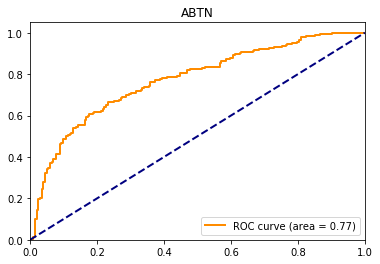

In [75]:
# # Add noisy features to make the problem harder
# n_samples, n_features = X.shape
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

##
# Using X1 ABTN in this cell for calculating
# ROC area
#

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=.5, random_state=0)


random_state = np.random.RandomState(0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ABTN')
plt.legend(loc="lower right")
plt.show()

In [76]:
roc_auc

{0: 0.7711344057152195,
 1: 0.7711344057152196,
 2: nan,
 'micro': 0.7234532894583304}

In [64]:
y_tr = main_df[target_var]

# Binarize the output
y_tr = label_binarize(y_tr, classes=[0, 1, 2])
n_classes_tr = y_tr.shape[1]

In [ ]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=.5, random_state=0)


random_state = np.random.RandomState(0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ABTN')
plt.legend(loc="lower right")
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


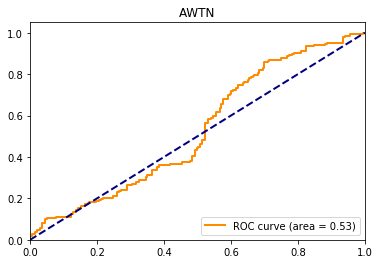

In [17]:
##
# Using X2 AWTN in this cell for calculating
# ROC area
#

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.5, random_state=0)


random_state = np.random.RandomState(0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('AWTN')
plt.legend(loc="lower right")
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


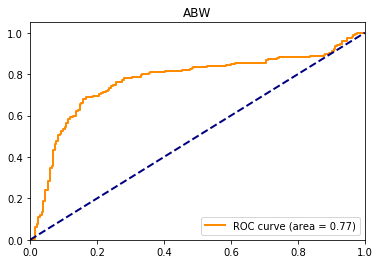

In [18]:
##
# Using X3 ABW in this cell for calculating
# ROC area
#

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=.5, random_state=0)


random_state = np.random.RandomState(0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ABW')
plt.legend(loc="lower right")
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


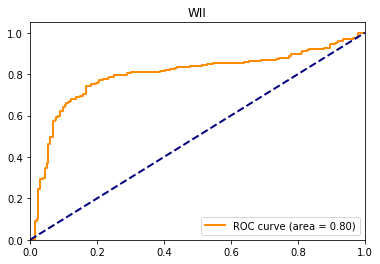

In [19]:
##
# Using X4 WII in this cell for calculating
# ROC area
#

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=.5, random_state=0)


random_state = np.random.RandomState(0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('WII')
plt.legend(loc="lower right")
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


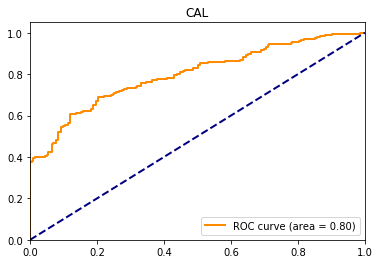

In [20]:
##
# Using X5 CAL in this cell for calculating
# ROC area
#

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=.5, random_state=0)


random_state = np.random.RandomState(0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('CAL')
plt.legend(loc="lower right")
plt.show()